# Principal Component Analysis (PCA) for Dimensionality Reduction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the data
data = pd.read_csv('points.csv')
data.head()

,x,y
0,0.108147,0.994135
1,0.796809,0.604232
2,0.082343,0.996604
3,0.944792,0.327670
4,0.991955,0.126592


In [4]:
# Transform the data into a matrix
X = np.array(data)

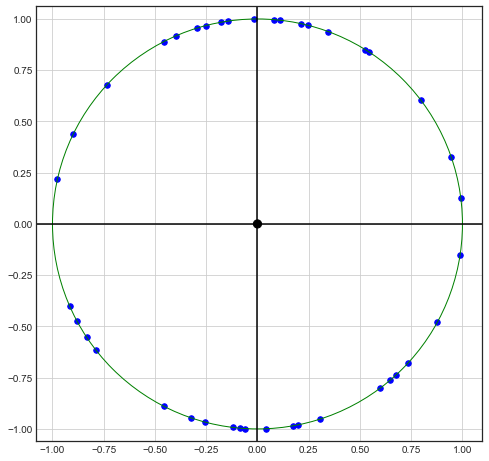

In [5]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (8,8)

fig, ax = plt.subplots()

# Plot the axis and the origin
ax.axhline(y=0, color='k', linewidth=1.5)
ax.axvline(x=0, color='k', linewidth=1.5)
center=plt.Circle((0,0),0.02, color='k')

circle = plt.Circle((0, 0), 1, color='g',fill=False)

plt.scatter(X[:,0], X[:,1], color="blue", s=30)
ax.add_artist(circle)
ax.add_artist(center)

plt.grid(b=True, which='major') # plot grid lines
plt.axis('equal');

Let's use a linear transformation $T$ mapping $\mathbb {R} ^{2}$ to $\mathbb {R} ^{2}$ defined by

$$
T(\vec{v})=\begin{bmatrix} 2 && 1 \\ 1 && 2 \end{bmatrix}\vec{v}
$$

to analyze what happens, with our dates when it is motivated by the linear transformation $T$. Any changes in a data on the circumference of a circle can be easily analyzed.

Note that $T(X)=$ `np.dot(X,T)`



In [6]:
# Create the linear operator T
T = np.array([[2,1],[1,2]])
T

array([[2, 1],
       [1, 2]])

### Let's see the arrangement of our new data, after the change made by operator T.

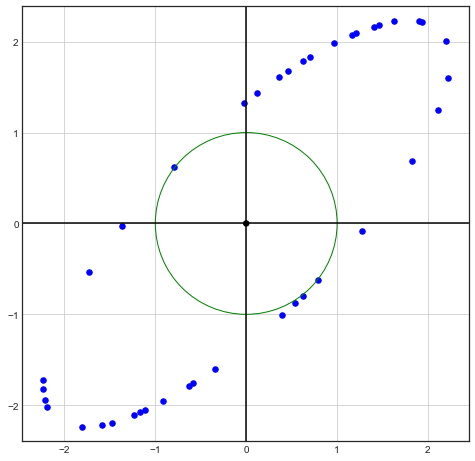

In [7]:
fig, ax = plt.subplots()

ax.axhline(y=0, color='k', linewidth=1.5)
ax.axvline(x=0, color='k', linewidth=1.5)
center=plt.Circle((0,0),0.03, color='k')

circle = plt.Circle((0, 0), 1, color='g',fill=False)

TX = np.dot(X,T)
plt.scatter(TX[:,0], TX[:,1], color="blue", s=30)
ax.add_artist(circle)
ax.add_artist(center)

plt.grid(b=True, which='major') #<-- plot grid lines
plt.axis('equal');

The $T$ transformations stretched the space in a particular direction as a consequence a rotation and scaling occurred for some points and perhaps for some part of the space nothing happened. For example:

- $T([-1,1]) = [-1,1]$ there was no alteration

- $T\left(\left[\sqrt{2},\sqrt{2}\right]\right) = \left[3\sqrt{2},3\sqrt{2}\right ]$ there was a scaling

The secret to understanding what will happen to any vector maped by $T$ is to know the eigenvalues and eigenvectors of the matrix,

$\begin{bmatrix} 2 && 1 \\ 1 && 2 \end{bmatrix}$.

The eigenvalue is the factor by which the space is stretched towards eigenvectors.



In [10]:
eigen_vals, eigen_vecs = np.linalg.eigh(T, UPLO='L')
print("Eigenvalues", eigen_vals, )
print("Eigevectors ", eigen_vecs)

Eigenvalues [1. 3.]
Eigevectors  [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


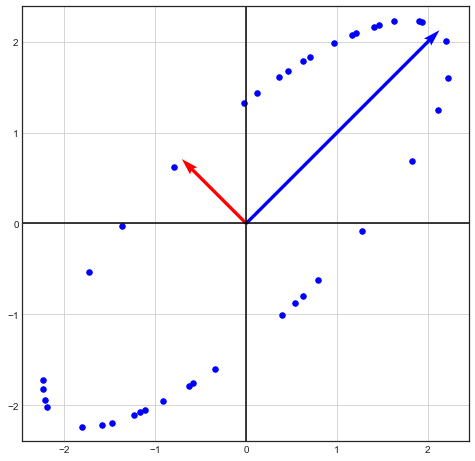

In [11]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (8,8)

fig, ax = plt.subplots()

ax.axhline(y=0, color='k', linewidth=1.5)
ax.axvline(x=0, color='k', linewidth=1.5)

# Plot the vectors
V = np.array([eigen_vecs[0],3*eigen_vecs[1]])
origin = [0], [0] # origin point

plt.scatter(TX[:,0], TX[:,1], color="blue", s=30)

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=4.9)
plt.grid(b=True, which='major') #<-- plot grid lines
plt.axis('equal');
plt.show()

### Now, let's make our eigenvectors the new axes of our next space using the rotation matrix or rotation trasformation that is the matrix of the eigenvectors.

In [12]:
v_1 = eigen_vecs[:,1]
v_2 = eigen_vecs[:,0]
x_1 = np.dot(TX, v_1)
y_1 = np.dot(TX, v_2)

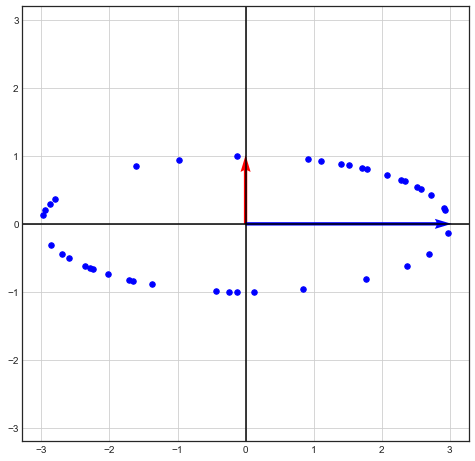

In [13]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (8,8)

fig, ax = plt.subplots()

ax.axhline(y=0, color='k', linewidth=1.5)
ax.axvline(x=0, color='k', linewidth=1.5)

V = np.array([[0,1],[3,0]])
origin = [0], [0] # origin point

plt.scatter(x_1, y_1, color="blue", s=30)

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=6.5)
plt.grid(b=True, which='major') #<-- plot grid lines
plt.axis('equal');
plt.show()

### Let's say that I would now like to describe our data in 1D. What we must do is project our data on one of the axes. Clearly, I see that the x-axis is the best choice because it has the greatest variation.

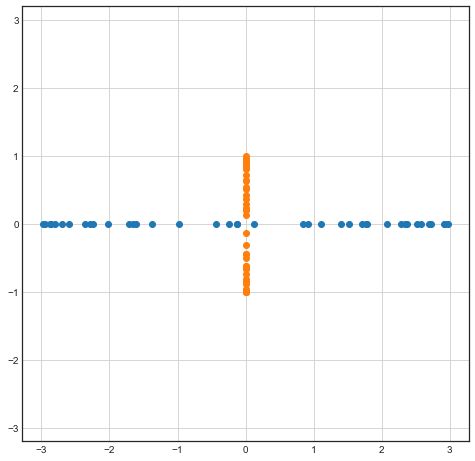

In [14]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (8,8)

x = TX[:,0]
y = TX[:,1]

ax.axhline(y=0, color='b')
ax.axvline(x=0, color='b')

plt.scatter(x_1,np.zeros(40))
plt.scatter(np.zeros(40),y_1)
plt.grid(b=True, which='major') #<-- plot grid lines
plt.axis('equal');

The eigenvectors corresponding to the largest eigenvalues are used to reduce the size of the data, minimizing the loss of information.

PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on

But in real life, there is no transformation ready to obtain its eigevalues and eigevectures. In real life, we have only the data. So how we do this? Using the **variance-covariant matrix**.

The formula for computing the covariance of the variables $x$ and $y$ is

$$
\text{COV}=\cfrac{\sum_i^n (x_i-\overline{x})(y_i-\overline{y})}{n-1},
$$
with $\overline{x}$ and $\overline{y}$ denoting the means of $x$ and $y$, respectively.



In [15]:
X_m = np.mean(TX, axis=0)
X_m

array([0.05603126, 0.0394291 ])

In [16]:
V = TX - np.mean(TX, axis=0)
conv1 = np.cov(V, rowvar=False)
conv1

array([[2.01415662, 2.01663402],
       [2.01663402, 3.05742259]])

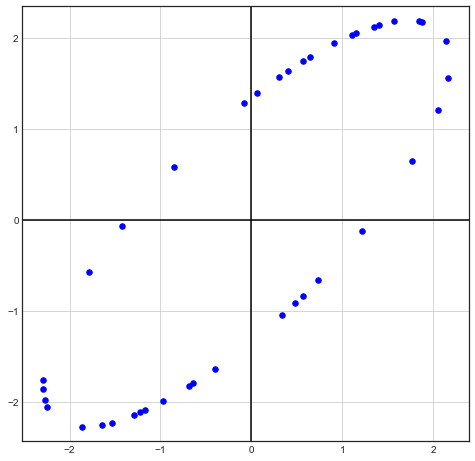

In [17]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (8,8)

fig, ax = plt.subplots()

ax.axhline(y=0, color='k', linewidth=1.5)
ax.axvline(x=0, color='k', linewidth=1.5)


x = V[:,0]
y = V[:,1]

plt.scatter(x, y, color="blue", s=30)

plt.grid(b=True, which='major') # plot grid lines
plt.axis('equal');

In [19]:
eigen_vals1, eigen_vecs1 = np.linalg.eigh(conv1, UPLO='L')
print("The eigenvalue", eigen_vals1)
print("The eigevectors", eigen_vecs1)

The eigenvalue [0.45278367 4.61879554]
The eigevectors [[-0.79070323  0.61219965]
 [ 0.61219965  0.79070323]]


In [20]:
v_1 = eigen_vecs1[:,1]
v_2 = eigen_vecs1[:,0]
x_1 = np.dot(V, v_1)
y_1 = np.dot(V, v_2)

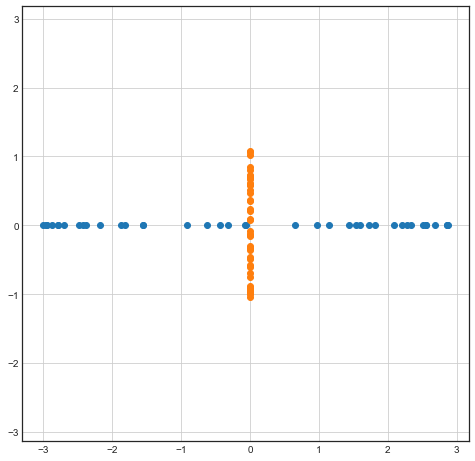

In [21]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (8,8)

ax.axhline(y=0, color='b')
ax.axvline(x=0, color='b')

plt.scatter(x_1,np.zeros(40))
plt.scatter(np.zeros(40),y_1)
plt.grid(b=True, which='major') #<-- plot grid lines
plt.axis('equal');